# EDA

In [2]:
import pandas as pd
import numpy as np
import json
import os
import re
from tqdm import tqdm

import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jirayuwat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
TRAIN_PATH = r"train_for_student.json"
TEST_PATH = r"test_for_student.json"

TRAIN_PATH = os.path.join(os.path.pardir, "data", TRAIN_PATH)
TEST_PATH = os.path.join(os.path.pardir, "data", TEST_PATH)

In [4]:
train_data = json.load(open(TRAIN_PATH))
test_data = json.load(open(TEST_PATH))

test_data

{'001eval': {'Title': 'Comparative Electrical Energy Yield Performance of Micro-Inverter PV Systems Using a Machine Learning Approach Based on a Mixed-Effect Model of Real Datasets',
  'Abstract': '© 2013 IEEE.Long-term energy evaluation of PV systems that use micro-inverter configuration (micro-inverter PV systems) is currently unclear due to the lacking of sufficient longitudinal measurement data and appropriate analysis method. The poor knowledge about impact and aging of micro-inverter PV system affects the comprehension and accuracy of PV design and simulation tools. In this paper, we propose a machine learning approach based on the mixed-effect model to compare and evaluate the electrical energy yield of micro-inverter PV systems. The analyzed results using a 5-year period data of PV stations located at Concord, Massachusetts, USA showed that there is no significant difference in yearly electrical energy yield of micro-inverter PV systems under shading and non-shading condition. 

## Simple preprocess

In [5]:
def text_preprocessing(text):
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)

    # Remove numberic
    text = re.sub(r'\d+', '', text)

    # Converting to Lowercase
    text = text.lower()

    # Remove stopwords
    text = [word for word in text.split() if word not in stopwords.words('english')]
    text = ' '.join(text)

    return text

In [6]:
for k in tqdm(train_data):
    train_data[k]['Title'] = text_preprocessing(train_data[k]['Title'])
    train_data[k]['Abstract'] = text_preprocessing(train_data[k]['Abstract'])


  0%|          | 0/454 [00:00<?, ?it/s]

100%|██████████| 454/454 [00:03<00:00, 144.15it/s]


## Show word cloud

In [7]:
word_count = dict()

for key in train_data.keys():
    for word in train_data[key]['Abstract'].split():
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

word_count = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}

print(f"""
Total unique words: {len(word_count)}
Top 10 words
""".strip())
for word in list(word_count.keys())[:10]:
    print(f"\t{word}: {word_count[word]}")

Total unique words: 8049
Top 10 words
	results: 293
	using: 289
	system: 281
	model: 245
	paper: 216
	based: 198
	study: 194
	used: 193
	method: 173
	data: 171


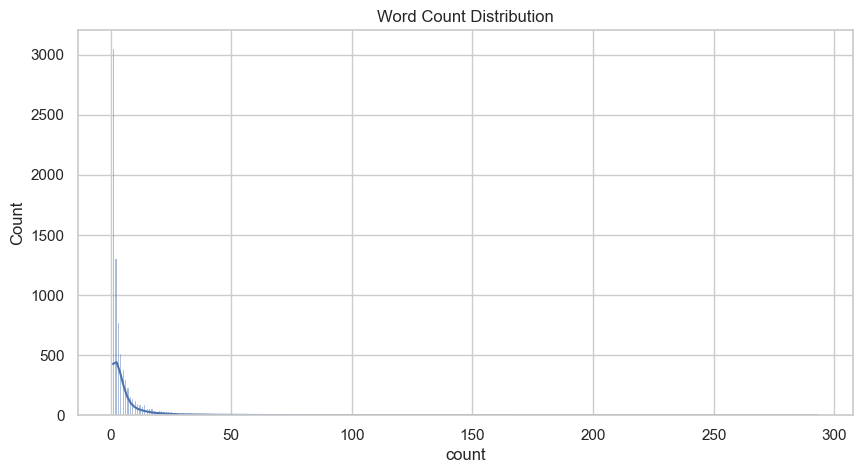

In [8]:
# plot word count distribution
word_count_df = pd.DataFrame(list(word_count.items()), columns=["word", "count"])
plt.figure(figsize=(10, 5))
sns.histplot(word_count_df["count"], kde=True)
plt.title("Word Count Distribution")
plt.show()

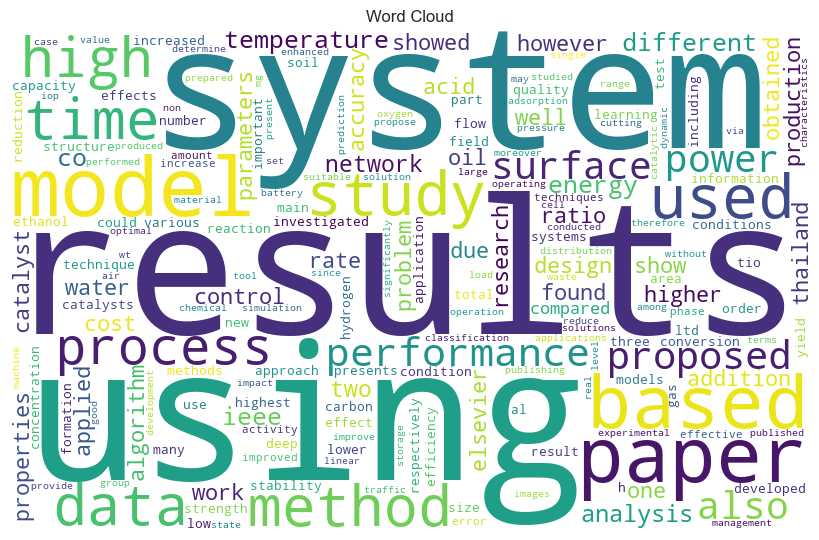

In [9]:
# word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = set(stopwords.words('english')),
                min_font_size = 10).generate_from_frequencies(word_count)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud")
plt.show()


## Count word by class

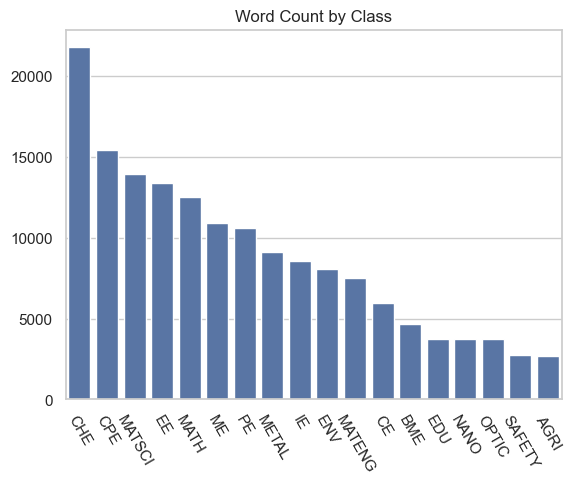

In [10]:
word_count_by_class = dict()

for k in train_data:
    for word in train_data[k]['Abstract'].split():
           for label in train_data[k]['Classes']:
                if label in word_count_by_class:
                    word_count_by_class[label] += 1
                else:
                    word_count_by_class[label] = 1

word_count_by_class = {k: v for k, v in sorted(word_count_by_class.items(), key=lambda item: item[1], reverse=True)}

sns.barplot(x=list(word_count_by_class.keys()),
            y=list(word_count_by_class.values()))
plt.title("Word Count by Class")
plt.xticks(rotation=-60)
plt.show()

# Create word count model

- count each by class
- cut only first 100 word on each class
- to predict
  - for each word, if exist in top100 of this class +1
  - predict to most score class
    - if equal predict to most exist class
  

In [11]:
word_hist = dict()

# Count word
for k in tqdm(train_data):
    for word in train_data[k]['Abstract'].split():
        for label in train_data[k]['Classes']:
            if label in word_hist:
                if word in word_hist[label]:
                    word_hist[label][word] += 1
                else:
                    word_hist[label][word] = 1
            else:
                word_hist[label] = {word: 1}

# Sort and get top 100
for label in word_hist:
    word_hist[label] = list({k: v for k, v in sorted(word_hist[label].items(), key=lambda item: item[1], reverse=True)[:100]}.keys())

100%|██████████| 454/454 [00:00<00:00, 12171.62it/s]


In [12]:
word_hist

{'CHE': ['co',
  'results',
  'temperature',
  'high',
  'using',
  'study',
  'catalyst',
  'surface',
  'system',
  'process',
  'acid',
  'oil',
  'catalysts',
  'ratio',
  'different',
  'reaction',
  'h',
  'production',
  'water',
  'performance',
  'carbon',
  'energy',
  'used',
  'ethanol',
  'properties',
  'tio',
  'higher',
  'elsevier',
  'based',
  'rate',
  'hydrogen',
  'found',
  'highest',
  'formation',
  'addition',
  'conversion',
  'also',
  'investigated',
  'showed',
  'soil',
  'low',
  'chemical',
  'yield',
  'adsorption',
  'concentration',
  'oxygen',
  'obtained',
  'respectively',
  'gas',
  'mg',
  'al',
  'increased',
  'reduction',
  'work',
  'method',
  'parameters',
  'efficiency',
  'catalytic',
  'activity',
  'applied',
  'wt',
  'stability',
  'time',
  'prepared',
  'power',
  'structure',
  'due',
  'waste',
  'enhanced',
  'amount',
  'however',
  'produced',
  'compared',
  'well',
  'could',
  'condition',
  'oxide',
  'area',
  'via',
  'e

## Predict

In [13]:
test_data

{'001eval': {'Title': 'Comparative Electrical Energy Yield Performance of Micro-Inverter PV Systems Using a Machine Learning Approach Based on a Mixed-Effect Model of Real Datasets',
  'Abstract': '© 2013 IEEE.Long-term energy evaluation of PV systems that use micro-inverter configuration (micro-inverter PV systems) is currently unclear due to the lacking of sufficient longitudinal measurement data and appropriate analysis method. The poor knowledge about impact and aging of micro-inverter PV system affects the comprehension and accuracy of PV design and simulation tools. In this paper, we propose a machine learning approach based on the mixed-effect model to compare and evaluate the electrical energy yield of micro-inverter PV systems. The analyzed results using a 5-year period data of PV stations located at Concord, Massachusetts, USA showed that there is no significant difference in yearly electrical energy yield of micro-inverter PV systems under shading and non-shading condition. 

In [24]:
submission_df = pd.DataFrame(columns= ['CE','ENV','BME','PE','METAL','ME','EE','CPE','OPTIC','NANO','CHE','MATENG','AGRI','EDU','IE','SAFETY','MATH','MATSCI'],
                             index= [k for k in test_data.keys()])

for k in test_data:
    submission_df.loc[k] = 0
    for word in test_data[k]['Abstract'].split():
        for label in submission_df.columns:
            if word in word_hist[label]:
                submission_df.at[k, label] += 1
    
    submission_df.loc[k] = submission_df.loc[k] / submission_df.loc[k].sum()
    max_label = submission_df.loc[k].idxmax()
    submission_df.at[k, max_label] = 1
    submission_df.loc[k] = submission_df.loc[k].astype(int)

submission_df.index.name = "id"
submission_df

,CE,ENV,BME,PE,METAL,ME,EE,CPE,OPTIC,NANO,CHE,MATENG,AGRI,EDU,IE,SAFETY,MATH,MATSCI
id,,,,,,,,,,,,,,,,,,
001eval,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
002eval,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
003eval,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
004eval,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
005eval,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147eval,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
148eval,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149eval,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
submission_df.to_csv("submission.csv")

In [27]:
# !kaggle competitions submit -c 2110446-data-science-2023-02 -f submission.csv -m "word count"

100%|██████████████████████████████████████| 6.57k/6.57k [00:02<00:00, 2.63kB/s]
Successfully submitted to 2110446 Data Science and Data Engineering Tools